<h1 style="font-family:cursive"><center>Projet Data Science</center></h1>
<h2 style="font-family:Verdana"><center>Arbre de décision: Tic-Tac-Toe</center></h2>

<b style="font-family:Trebuchet ;font-size:1.7em"> I-Introduction et importations: </b>

<p style="font-family:Times New Roman;font-size:1.4em">L'apprentissage automatique (machine learning) ,apprentissage artificiel ou apprentissage statistique est un champ d'étude de l'intelligence artificielle qui se fonde sur des approches mathématiques et statistiques pour donner aux ordinateurs la capacité d'« apprendre » à partir de données, c'est-à-dire d'améliorer leurs performances à résoudre des tâches sans être explicitement programmés pour chacune. Plus largement, il concerne la conception, l'analyse, l'optimisation, le développement et l'implémentation de telles méthodes.</p>

<p style="font-family:Times New Roman;font-size:1.4em"> Tic-Tac-Toe est un jeu simple pour deux joueurs auquel nous aimions jouer quand nous étions enfants (surtout dans les salles de classe ennuyeuses). Le jeu implique que 2 joueurs placent leurs symboles respectifs dans une grille 3x3. Le joueur qui parvient à placer trois de ses symboles en rangée horizontale/verticale/diagonale remporte la partie. Si l'un des joueurs ne parvient pas à le faire, la partie se termine par un match nul. Si les deux joueurs jouent toujours leurs stratégies optimales, le jeu se termine toujours par un match nul. </p>

<b style="font-family:Tahoma;font-size:1.2em">Numpy: bibliothéque pour la manipulation des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux </b>

In [1]:
import numpy as np

<b style="font-family:Tahoma;font-size:1.2em">Pandas: bibliothéque pour la manipulation et l'analyse des données <b>

In [2]:
import pandas as pd

<b style="font-family:Tahoma;font-size:1.2em">L’apprentissage par arbre de décision désigne une méthode basée sur l'utilisation d'un arbre de décision comme modèle prédictif. </b>

In [3]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

<b style="font-family:Tahoma;font-size:1.2em">train_test_split(): Diviser des tableaux ou des matrices (datasets) en sous-ensembles de train et de test aléatoires </b>

In [4]:
from sklearn.model_selection import train_test_split # Import train_test_split function

<b style="font-family:Tahoma;font-size:1.2em"> matplotlib: bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques. </b>

In [5]:
from matplotlib import pyplot as plt

<b style="font-family:Tahoma;font-size:1.2em">Le module sklearn.tree comprend des modèles basés sur des arbres de décision pour la classification et la régression. </b>
<b style="font-family:Tahoma;font-size:1.2em"> Le sklearn.metrics : module de métriques implémente plusieurs fonctions de perte, de score et d'utilité pour mesurer les performances de classification.</b>

In [6]:
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<b style="font-family:Trebuchet ;font-size:1.7em"> II-Description des données: </b> <br>
<b style="font-family:Tahoma;font-size:1.2em"> Sources de données: https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/ </b>

<b style="font-family:Tahoma;font-size:1.3em">II.1 Format des données </b>

<p style="font-family:Times New Roman;font-size:1.4em">Dans cet dataset, nous avons 10 colonnes ( ['x','x.1','x.2','x.3', 'o', 'o.1', 'x.4', 'o.2', 'o.3'] pour les attributs et  ['positive'] pour les classes) <p>
<ul>
  <li style="font-family:Times New Roman;font-size:1.4em">b,o,b,x,o,x,x,o,b => negative (partie nulle)</li>
  <li style="font-family:Times New Roman;font-size:1.4em">x,b,x,o,x,o,x,b,o => positive (P1 ou P2 gagnant)</li>

</ul> 

In [7]:
df = pd.read_csv('./tic-tac-toe.data',',')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


<b style="font-family:Tahoma;font-size:1.3em">II.2 Encoder l'objet en tant que type énuméré </b>
<p style="font-family:Times New Roman;font-size:1.4em">La nouvelle représentation du dataset est la suivante : 
 <ul>
  <li style="font-family:Times New Roman;font-size:1.4em"> x => 2</li>
  <li style="font-family:Times New Roman;font-size:1.4em"> o => 1</li>
 <li style="font-family:Times New Roman;font-size:1.4em"> b => 0</li>
      <li style="font-family:Times New Roman;font-size:1.4em">  positive => 1</li>
      <li style="font-family:Times New Roman;font-size:1.4em"> negative => 0</li>
</ul> 
   



    


<b style="font-family:Tahoma;font-size:1.2em"> factorize(): Cette méthode est utile pour obtenir une représentation numérique d'un tableau lorsque tout ce qui compte est d'identifier des valeurs distinctes. </b>

In [9]:
df['x'],v1 = pd.factorize(df['x'], sort=True)
df['x.1'],v2 = pd.factorize(df['x.1'], sort=True)
df['x.2'],v3 = pd.factorize(df['x.2'], sort=True)
df['x.3'],v4 = pd.factorize(df['x.3'], sort=True)
df['o'],v5 = pd.factorize(df['o'], sort=True)
df['o.1'],v6 = pd.factorize(df['o.1'], sort=True)
df['x.4'],v7 = pd.factorize(df['x.4'], sort=True)
df['o.2'],v8 = pd.factorize(df['o.2'], sort=True)
df['o.3'],v9 = pd.factorize(df['o.3'], sort=True)
df['positive'],v10 = pd.factorize(df['positive'], sort=True)


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   x         957 non-null    int64
 1   x.1       957 non-null    int64
 2   x.2       957 non-null    int64
 3   x.3       957 non-null    int64
 4   o         957 non-null    int64
 5   o.1       957 non-null    int64
 6   x.4       957 non-null    int64
 7   o.2       957 non-null    int64
 8   o.3       957 non-null    int64
 9   positive  957 non-null    int64
dtypes: int64(10)
memory usage: 74.9 KB


,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


<b style="font-family:Tahoma;font-size:1.2em">Les attributs sont les 9 premiers colonnes </b>

In [11]:
feature_names = ['x','x.1','x.2','x.3', 'o', 'o.1', 'x.4', 'o.2', 'o.3']

In [12]:
x_train = df[feature_names] # Features
x_train

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
0,2,2,2,2,1,1,1,2,1
1,2,2,2,2,1,1,1,1,2
2,2,2,2,2,1,1,1,0,0
3,2,2,2,2,1,1,0,1,0
4,2,2,2,2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2
953,1,2,1,2,2,1,2,1,2
954,1,2,1,2,1,2,2,1,2
955,1,2,1,1,2,2,2,1,2


<b style="font-family:Tahoma;font-size:1.2em"> Les classes sont : La dérniere colonne  <b>

In [13]:
y_train = df['positive'] # Target
y_train

0      1
1      1
2      1
3      1
4      1
      ..
952    0
953    0
954    0
955    0
956    0
Name: positive, Length: 957, dtype: int64

<p style="font-family:Times New Roman;font-size:1.4em"> Le gain d'informations est basé sur la diminution de l'entropie après la division d'un ensemble de données sur un attribut. Construire un arbre de décision consiste à trouver l'attribut qui renvoie le gain d'informations le plus élevé (c'est-à-dire les branches les plus homogènes). </p>
<b style="font-family:Tahoma;font-size:1.2em">  fit() est implémenté par chaque estimateur et il accepte une entrée pour les données d'échantillon ( X ) et pour les modèles supervisés, il accepte également un argument pour les étiquettes (c'est-à-dire les données cibles y ). </b> <br>
<b style="font-family:Tahoma;font-size:1.2em">  plot_tree() pour Tracez un arbre de décision. </b> <br>
<b style="font-family:Tahoma;font-size:1.2em">  Le graphe résultat est l'arbre compléte aprés l'entrainement du Modéle. </b>

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


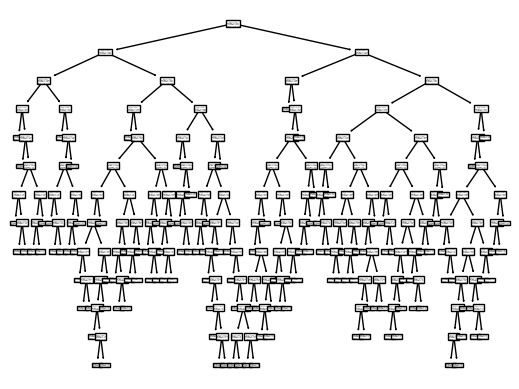

In [14]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
clf
tree.plot_tree(clf)
plt.show()

<p style="font-family:Times New Roman;font-size:1.4em"> Les tests ont été effectués en recréant l'arbre de décision formé uniquement sur 70 % de l'ensemble de données et en le testant par rapport aux 30 % restants. Cela a été fait en utilisant la fonction train_test_split importée au début de ce cahier, et la méthode .predict() du DecisionTreeClassifier. </p>

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1)
[x_train, x_test, y_train, y_test]

[     x  x.1  x.2  x.3  o  o.1  x.4  o.2  o.3
 880  0    2    2    2  0    0    1    1    1
 593  0    0    2    1  2    1    2    0    0
 716  2    0    1    2  2    1    1    2    1
 341  1    2    1    0  2    0    0    2    0
 291  2    0    0    0  2    1    1    0    2
 ..  ..  ...  ...  ... ..  ...  ...  ...  ...
 767  1    2    2    0  1    2    2    1    1
 72   2    2    2    0  0    1    0    1    0
 908  0    2    0    2  0    2    1    1    1
 235  2    0    2    0  2    1    2    1    1
 37   2    2    2    1  0    1    2    0    1
 
 [669 rows x 9 columns],
      x  x.1  x.2  x.3  o  o.1  x.4  o.2  o.3
 241  2    0    1    2  2    1    2    1    0
 848  1    1    0    1  2    2    1    2    2
 436  1    0    2    1  2    0    2    1    2
 386  1    1    2    1  2    0    2    0    2
 345  1    2    0    2  2    2    1    0    1
 ..  ..  ...  ...  ... ..  ...  ...  ...  ...
 808  1    1    2    1  2    0    1    2    2
 134  2    1    2    1  0    2    0    1    2
 669  2

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


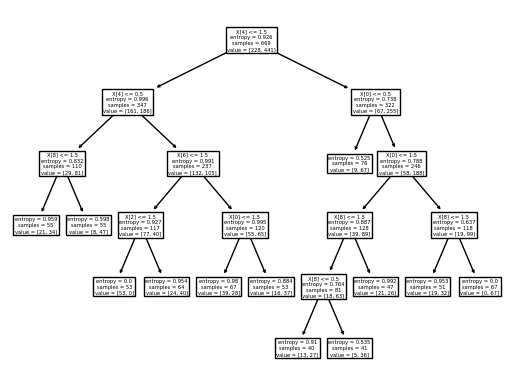

In [16]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=80) # change this classifier and check the impact
clf = clf.fit(x_train,y_train)
tree.plot_tree(clf)
plt.show()

In [17]:
# use the model to make predictions with the test data
y_pred = clf.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Les lignes non classés: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f} %'.format(accuracy * 100))

Les lignes non classés: 77
Accuracy: 73.26 %
